In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import datetime as dt
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import itertools
from subprocess import check_output
from scipy import spatial
print(check_output(["ls", "../Data-Science-Project"]).decode("utf8"))

111903125_111903126_111903127.pdf
Assgn1-Data-111903125_111903126_111903127.csv
ds.ipynb
ds_latest.ipynb
ds_new.ipynb
README.md



In [3]:
# data2 = pd.read_csv("data.csv")
# data2.head()
df = pd.read_csv('Assgn1-Data-111903125_111903126_111903127.csv')
df.columns = ['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'DOLoctionID', 'PULocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']
df.head()


,lpep_pickup_datetime,lpep_dropoff_datetime,DOLoctionID,PULocationID,passenger_count,trip_distance,fare_amount,tip_amount
0,2021-02-01 00:34:03,2021-02-01 00:51:58,205,130,5,3.66,14.0,10.00
1,2021-02-01 00:04:00,2021-02-01 00:10:30,244,152,1,1.10,6.5,0.00
2,2021-02-01 00:18:51,2021-02-01 00:34:06,48,152,1,4.93,16.5,0.00
3,2021-02-01 00:53:27,2021-02-01 01:11:41,241,152,1,6.70,21.0,0.00
4,2021-02-01 00:57:46,2021-02-01 01:06:44,42,75,1,1.89,8.5,2.45


In [4]:
# data2.describe()
df.describe()

,DOLoctionID,PULocationID,passenger_count,trip_distance,fare_amount,tip_amount
count,64572.000000,64572.000000,64572.000000,64572.000000,64572.000000,64572.000000
mean,130.662114,110.630691,1.186180,17.961370,19.754023,0.889773
std,77.270118,71.491400,0.724291,817.274665,14.305999,2.015467
min,1.000000,3.000000,0.000000,0.000000,-100.000000,-1.140000
25%,65.000000,58.000000,1.000000,1.310000,9.000000,0.000000
50%,128.000000,76.000000,1.000000,2.600000,16.730000,0.000000
75%,197.000000,166.000000,1.000000,5.700000,25.180000,1.060000
max,265.000000,265.000000,7.000000,102620.980000,205.000000,80.000000


In [5]:
# sns.pairplot(df, hue=None)

In [6]:
PUdatetimedf=df.loc[:,'lpep_pickup_datetime']
DOdatetimedf=df.loc[:,'lpep_dropoff_datetime']
print(PUdatetimedf,   DOdatetimedf)

t1=pd.to_datetime(PUdatetimedf, format="%Y/%m/%d %H:%M:%S")
t2=pd.to_datetime(DOdatetimedf, format="%Y/%m/%d %H:%M:%S")
df['PUday']=t1.dt.day
df['DOday']=t2.dt.day

print(df)

0        2021-02-01 00:34:03
1        2021-02-01 00:04:00
2        2021-02-01 00:18:51
3        2021-02-01 00:53:27
4        2021-02-01 00:57:46
                ...         
64567    2021-02-26 08:46:00
64568    2021-02-26 08:56:00
64569    2021-02-26 08:46:00
64570    2021-02-26 08:17:00
64571    2021-02-26 08:12:00
Name: lpep_pickup_datetime, Length: 64572, dtype: object 0        2021-02-01 00:51:58
1        2021-02-01 00:10:30
2        2021-02-01 00:34:06
3        2021-02-01 01:11:41
4        2021-02-01 01:06:44
                ...         
64567    2021-02-26 08:59:00
64568    2021-02-26 09:10:00
64569    2021-02-26 09:07:00
64570    2021-02-26 08:51:00
64571    2021-02-26 08:29:00
Name: lpep_dropoff_datetime, Length: 64572, dtype: object
      lpep_pickup_datetime lpep_dropoff_datetime  DOLoctionID  PULocationID  \
0      2021-02-01 00:34:03   2021-02-01 00:51:58          205           130   
1      2021-02-01 00:04:00   2021-02-01 00:10:30          244           152   
2      202

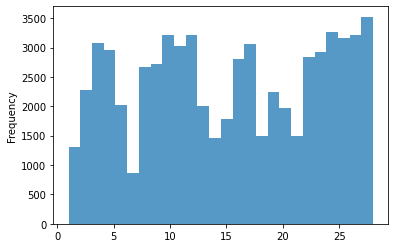

In [7]:
#pickup per day
df1=df.iloc[:,8]
df1.plot.hist(alpha=0.75, bins=26)
plt.show()

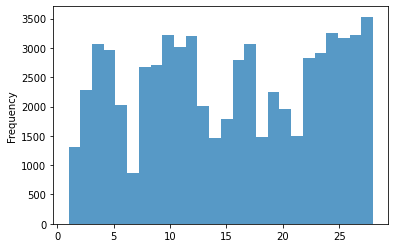

In [8]:
#drops per day
df1=df.iloc[:,9]
df1.plot.hist(alpha=0.75, bins=26)
plt.show()

      lpep_pickup_datetime lpep_dropoff_datetime  DOLoctionID  PULocationID  \
0      2021-02-01 00:34:03   2021-02-01 00:51:58          205           130   
1      2021-02-01 00:04:00   2021-02-01 00:10:30          244           152   
2      2021-02-01 00:18:51   2021-02-01 00:34:06           48           152   
3      2021-02-01 00:53:27   2021-02-01 01:11:41          241           152   
4      2021-02-01 00:57:46   2021-02-01 01:06:44           42            75   
...                    ...                   ...          ...           ...   
64567  2021-02-26 08:46:00   2021-02-26 08:59:00          247           167   
64568  2021-02-26 08:56:00   2021-02-26 09:10:00          123            89   
64569  2021-02-26 08:46:00   2021-02-26 09:07:00          166           127   
64570  2021-02-26 08:17:00   2021-02-26 08:51:00          137            42   
64571  2021-02-26 08:12:00   2021-02-26 08:29:00          236            74   

       passenger_count  trip_distance  fare_amount 

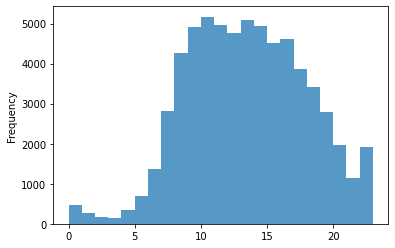

In [9]:
#hourwise trips
df['hour']=t1.dt.hour
print(df)
df2=df.iloc[:,10]
df2.plot.hist(alpha=0.75, bins=23)
plt.show()

      lpep_pickup_datetime lpep_dropoff_datetime  DOLoctionID  PULocationID  \
0      2021-02-01 00:34:03   2021-02-01 00:51:58          205           130   
1      2021-02-01 00:04:00   2021-02-01 00:10:30          244           152   
2      2021-02-01 00:18:51   2021-02-01 00:34:06           48           152   
3      2021-02-01 00:53:27   2021-02-01 01:11:41          241           152   
4      2021-02-01 00:57:46   2021-02-01 01:06:44           42            75   
...                    ...                   ...          ...           ...   
64567  2021-02-26 08:46:00   2021-02-26 08:59:00          247           167   
64568  2021-02-26 08:56:00   2021-02-26 09:10:00          123            89   
64569  2021-02-26 08:46:00   2021-02-26 09:07:00          166           127   
64570  2021-02-26 08:17:00   2021-02-26 08:51:00          137            42   
64571  2021-02-26 08:12:00   2021-02-26 08:29:00          236            74   

       passenger_count  trip_distance  fare_amount 

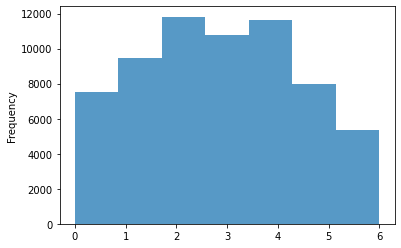

In [10]:
df['DayOfWeekNum']=t1.dt.dayofweek
df['DayOfWeek']=t1.dt.day_name()
print(df)
df2=df.iloc[:,11]
df2.plot.hist(alpha=0.75, bins=7)
plt.show()

(array([ 4010.,  9774., 11040.,  4525.,  4141.,  6291.,  5952.,  4062.,
         7751.,  7026.]),
 array([  1. ,  27.4,  53.8,  80.2, 106.6, 133. , 159.4, 185.8, 212.2,
        238.6, 265. ]),
 <BarContainer object of 10 artists>)

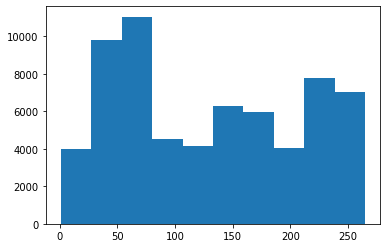

In [11]:
plt.hist(df['DOLoctionID'])

(array([ 4539., 11408., 17442.,  6086.,  4105.,  2983.,  5045.,  3332.,
         3704.,  5928.]),
 array([  3. ,  29.2,  55.4,  81.6, 107.8, 134. , 160.2, 186.4, 212.6,
        238.8, 265. ]),
 <BarContainer object of 10 artists>)

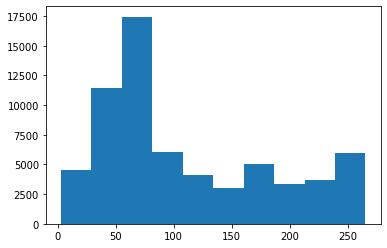

In [12]:
plt.hist(df['PULocationID'])

(array([1.0000e+00, 8.0000e+00, 1.1000e+01, 4.3271e+04, 1.8903e+04,
        2.1360e+03, 2.2700e+02, 5.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([-100. ,  -69.5,  -39. ,   -8.5,   22. ,   52.5,   83. ,  113.5,
         144. ,  174.5,  205. ]),
 <BarContainer object of 10 artists>)

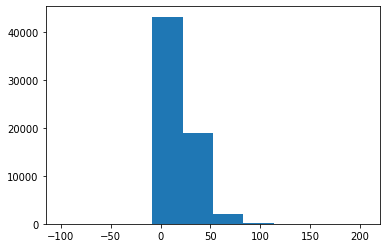

In [13]:
plt.hist(df['fare_amount'])

In [14]:
array = df['fare_amount']
count1 = 0
count2 = 0
count3 = 0
# print(len(a))
for i in range (0,len(array)):
#     print(a[i])
    if(array[i] >= 0 and array[i] <= 10):
        count1 = count1 + 1
    elif(array[i] > 10 and array[i] <= 30):
        count2 = count2 + 1
    else:
        count3 = count3 + 1

lowper = (count1*100)/len(array)
medper = (count2*100)/len(array)
highper = (count3*100)/len(array)
print("Low fare amount ",lowper)
print("Medium fare amount ",medper)
print("High fare amount ",highper)

Low fare amount  29.107043300501765
Medium fare amount  53.71987858514527
High fare amount  17.173078114352972


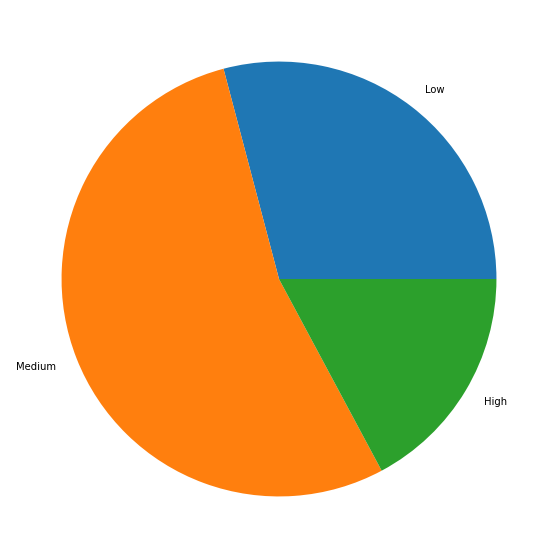

In [15]:
category = ['Low', 'Medium', 'High']
data = [lowper, medper, highper]
fig = plt.figure(figsize = (10,10))
plt.pie(data, labels = category)
plt.show()

In [16]:
array2 = df['trip_distance']
count4 = 0
count5 = 0
count6 = 0
# print(len(a))
for i in range (0,len(array2)):
#     print(a[i])
    if(array2[i] >= 0 and array2[i] <= 10):
        count4 = count4 + 1
    elif(array2[i] > 10 and array2[i] <= 30):
        count5 = count5 + 1
    else:
        count6 = count6 + 1


lowper = (count4*100)/len(array2)
medper = (count5*100)/len(array2)
highper = (count6*100)/len(array2)
print("Low fare amount ",lowper)
print("Medium fare amount ",medper)
print("High fare amount ",highper)      
    
    

Low fare amount  88.13262714489252
Medium fare amount  11.549897788515146
High fare amount  0.31747506659233105


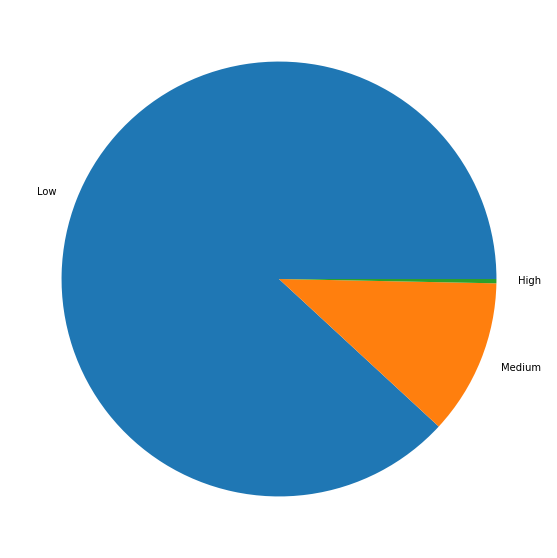

In [17]:
category = ['Low', 'Medium', 'High']
data = [lowper, medper, highper]
fig = plt.figure(figsize = (10,10))
plt.pie(data, labels = category)
plt.show()

<AxesSubplot:xlabel='fare_amount'>

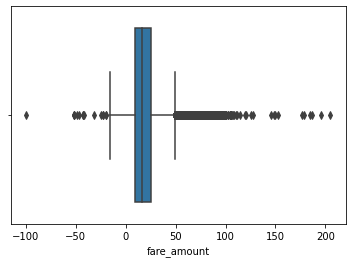

In [18]:
sns.boxplot(x=df['fare_amount'])

<AxesSubplot:xlabel='tip_amount'>

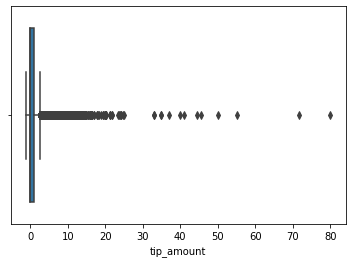

In [19]:
sns.boxplot(x=df['tip_amount'])

<AxesSubplot:xlabel='trip_distance'>

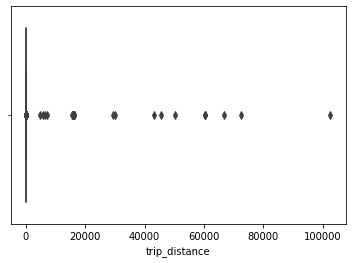

In [20]:
sns.boxplot(x=df['trip_distance'])

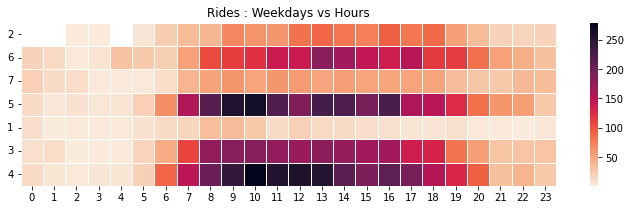

In [21]:
# grouping the data on the basis of days and hours
grouped_day_hour = df.groupby(['PUday','hour'])['hour'].count().unstack()
plt.figure(figsize=(12,3))
sns.heatmap(grouped_day_hour.iloc[[1,5,6,4,0,2,3]],
            cmap='rocket_r',
            linewidths=0.5,
            linecolor='white')

# rotating y axis ticks
plt.yticks(rotation=0)

# removing x and y label
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rides : Weekdays vs Hours');

Text(0, 0.5, 'fare_amount')

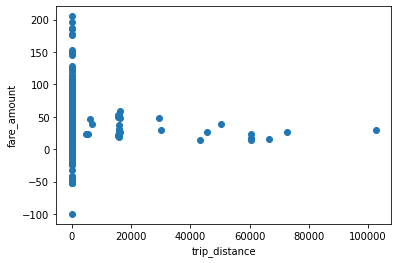

In [22]:
x = df['trip_distance']
y = df['fare_amount']
plt.scatter(x,y)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
# plt.title('Graph in 2D')
# plt.savefig('Test.png')

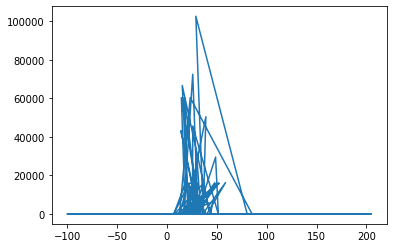

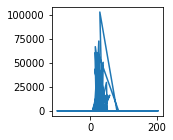

In [23]:
x = df['fare_amount']
y = df['trip_distance']
display(plt.plot(x, y))
  
# changing the size of figure to 2X2
plt.figure(figsize=(2, 2))
display(plt.plot(x, y))

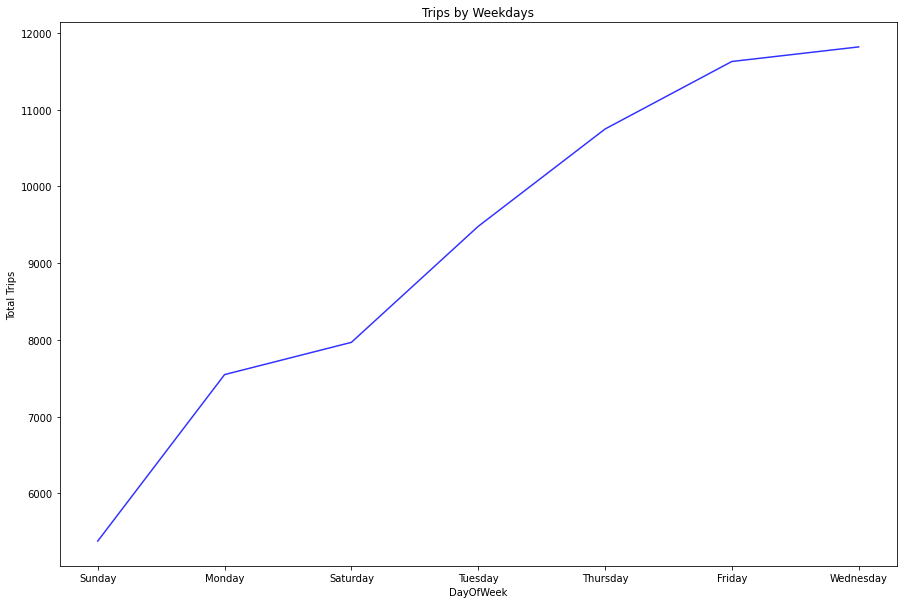

In [24]:
trips_week = df.groupby('DayOfWeek')['PUday'].count().sort_values(ascending=True)

plt.figure(figsize=(15, 10))
trips_week.plot(kind='line', color='b', alpha=0.8)
plt.ylabel('Total Trips')
plt.title('Trips by Weekdays');
plt.show()

In [25]:
dfn = pd.read_csv(r"Assgn1-Data-111903125_111903126_111903127.csv" , encoding= 'unicode_escape')
columns = ['DOLoctionID', 'PULocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']
for column in columns:
    df[column] = df[column]/df[column].abs().max()
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,DOLoctionID,PULocationID,passenger_count,trip_distance,fare_amount,tip_amount,PUday,DOday,hour,DayOfWeekNum,DayOfWeek
0,2021-02-01 00:34:03,2021-02-01 00:51:58,0.773585,0.490566,0.714286,0.000036,0.068293,0.125000,1,1,0,0,Monday
1,2021-02-01 00:04:00,2021-02-01 00:10:30,0.920755,0.573585,0.142857,0.000011,0.031707,0.000000,1,1,0,0,Monday
2,2021-02-01 00:18:51,2021-02-01 00:34:06,0.181132,0.573585,0.142857,0.000048,0.080488,0.000000,1,1,0,0,Monday
3,2021-02-01 00:53:27,2021-02-01 01:11:41,0.909434,0.573585,0.142857,0.000065,0.102439,0.000000,1,1,0,0,Monday
4,2021-02-01 00:57:46,2021-02-01 01:06:44,0.158491,0.283019,0.142857,0.000018,0.041463,0.030625,1,1,0,0,Monday


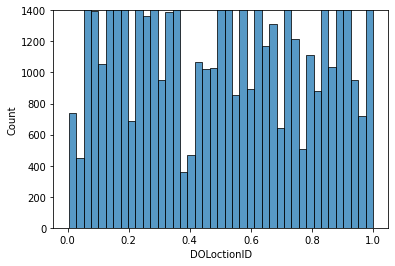

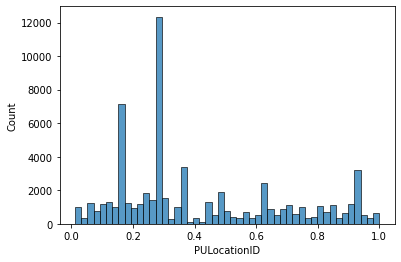

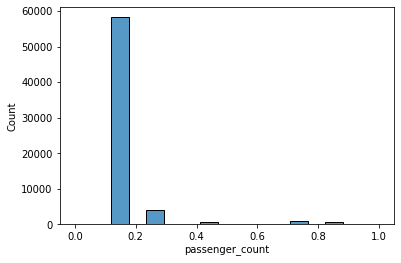

In [26]:
df["lpep_pickup_datetime"] = dfn["lpep_pickup_datetime"]
sns.histplot(x = 'DOLoctionID' , data=df, )
plt.ylim([0, 1400])
plt.show()

sns.histplot(x = 'PULocationID' , data=df, )
plt.show()

sns.histplot(x = 'passenger_count' , data=df, )
plt.show()

In [44]:
PUdatetimedf=df.loc[:,'lpep_pickup_datetime']
DOdatetimedf=df.loc[:,'lpep_dropoff_datetime']
print(PUdatetimedf,   DOdatetimedf)

t1=pd.to_datetime(PUdatetimedf, format="%Y/%m/%d %H:%M:%S")
t2=pd.to_datetime(DOdatetimedf, format="%Y/%m/%d %H:%M:%S")

date = PUdatetimedf.str.split(" ")

x=[]
for i in range (len(date)):
    x.append(date[i][0])

y = df['DOLoctionID']

z = df['PULocationID']

print(spatial.distance.cosine(y,z))

y1 = df['trip_distance']

z1 = df['fare_amount']

distance = spatial.distance.euclidean(y1,z1)

print(spatial.distance.cosine(y1,z1))
y2 = df['tip_amount']

z2 = df['fare_amount']
print(spatial.distance.cosine(y2,z2))

0        2021-02-01 00:34:03
1        2021-02-01 00:04:00
2        2021-02-01 00:18:51
3        2021-02-01 00:53:27
4        2021-02-01 00:57:46
                ...         
64567    2021-02-26 08:46:00
64568    2021-02-26 08:56:00
64569    2021-02-26 08:46:00
64570    2021-02-26 08:17:00
64571    2021-02-26 08:12:00
Name: lpep_pickup_datetime, Length: 64572, dtype: object 0        2021-02-01 00:51:58
1        2021-02-01 00:10:30
2        2021-02-01 00:34:06
3        2021-02-01 01:11:41
4        2021-02-01 01:06:44
                ...         
64567    2021-02-26 08:59:00
64568    2021-02-26 09:10:00
64569    2021-02-26 09:07:00
64570    2021-02-26 08:51:00
64571    2021-02-26 08:29:00
Name: lpep_dropoff_datetime, Length: 64572, dtype: object
0.2407499545137627
0.9736741325821368
0.7005192979207264


In [45]:
def jaccard(list1, list2):
    j = float(len(list1.intersection(list2))) / len(list1.union(list2))
    return j

a = set(df['trip_distance'])
b = set(df['fare_amount'])
result1 = jaccard(a, b)
print(result1)

0.00032599837000814997
